# Convolution Neural Network

CNN allow us to extract the features of the image while maintaining the spatial arrangement of the image. 

They use three concepts to create a feature transformation
- **Convolutional layers** multiply kernel value by the image window and optimize the kernel weights over time using gradient descent
- **Pooling layers** describe a window of an image using a single value which is the max or the average of that window
- **Activation layers** squash the values into a range, typically [0,1] or [-1,1]

Params for each type
- **Convolution**: Kernel, Filters, Padding, Stride
- **Pooling**: Max, 
- **Activation**: Relu, Sigmoid, ...

In [1]:
import numpy as np
import keras
import imageio
import matplotlib.pyplot as plt
% matplotlib inline
import vis

Using TensorFlow backend.


## Building Intution

Let us get an image of a cheetah

In [2]:
url = "https://source.unsplash.com/U66avewmxJk/400x300"

In [3]:
cheetah = imageio.imread(url)

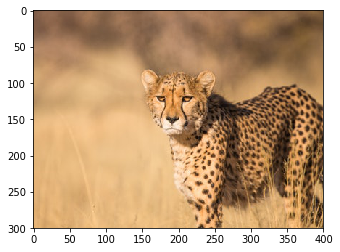

In [4]:
plt.imshow(cheetah);

In [5]:
import skimage

In [6]:
image_gray = skimage.color.rgb2gray(cheetah)

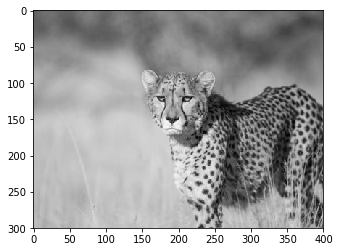

In [7]:
plt.imshow(image_gray, cmap="gray")

In [8]:
image_gray.shape

(300, 400)

In [9]:
image = image_gray.reshape(300, 400, 1)

## What is a Convolution?

Let us apply a convolution with 1 filter

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation

In [26]:
filters = 1
kernal_size = (2, 2)

In [27]:
model1 = Sequential()
model1.add(Conv2D(filters, kernal_size, input_shape=(300,400,1)))

In [28]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 299, 399, 1)       5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.layers[0].get_weights()

[array([[[[ 0.5599417 ]],
 
         [[ 0.18687695]]],
 
 
        [[[ 0.38267225]],
 
         [[-0.49616396]]]], dtype=float32), array([0.], dtype=float32)]

In [30]:
def convolution(image, model):
    print("Original Shape:", image.shape)
    image = image/255
    image_batch = np.array([image])
    conv_image = model.predict(image_batch)    
    conv_image = conv_image.squeeze()
    print("New Shape:", conv_image.shape)
    #print(conv_image)
    plt.imshow(conv_image, cmap="gray")

Original Shape: (300, 400, 1)
New Shape: (299, 399)


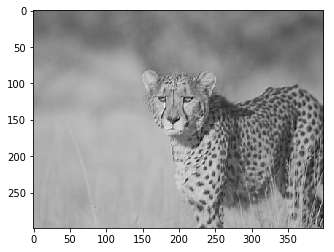

In [31]:
convolution(image, model1)

### With Convolution + Activation

In [32]:
model2 = Sequential()
model2.add(Conv2D(1, (3, 3), input_shape=(300,400,1)))
model2.add(Activation("relu"))

Original Shape: (300, 400, 1)
New Shape: (298, 398)


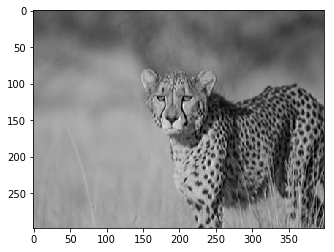

In [33]:
convolution(image, model2)

### With Convolution + Pooling

In [34]:
model3 = Sequential()
model3.add(Conv2D(1, (8, 8), input_shape=(300,400,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

Original Shape: (300, 400, 1)
New Shape: (146, 196)


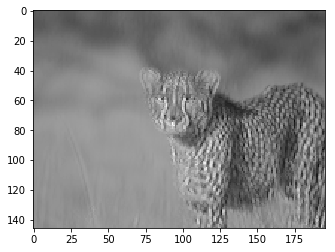

In [35]:
convolution(image, model3)

## Convolution + Activation + Pooling

In [36]:
model4 = Sequential()
model3.add(Conv2D(1, (8, 8), input_shape=(300,400,1)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))

Original Shape: (300, 400, 1)
New Shape: (146, 196)


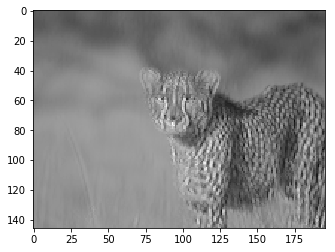

In [37]:
convolution(image, model3)